# Задание
Реализовать с помощью объектно-ориентированного подхода предыдущие 2 задания. Создайте для каждой из задач отдельный класс, который позволяет ее решить.

* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe, а также в excel, pickle, БД

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных

*  Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.


In [18]:
import pandas as pd
import requests
from requests.exceptions import ReadTimeout
import sqlite3
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pylab import rcParams
from IPython.display import display

In [2]:
   
def search_object_list(url):
    res = requests.get(url)   
    objects_data = res.json() 
    objects_list = objects_data.get('data').get('list')
    objids = [x.get('objId') for x in objects_list]
    return objids

def unload_data(objids):
    data_base = []
    for i in objids:
        url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{i}'
        res = requests.get(url)
        data_base.append(res.json())
    return data_base

def save(data_base): 
        df = pd.json_normalize(data_base)
        df = df.applymap(str)       
        conn = sqlite3.connect('test_database')
        df.to_sql('construction_projects', conn, if_exists='replace', index=False)
        conn.commit()
        conn.close()
        df.to_csv('construction_projects1.csv')
        df.to_excel('construction_projects1.xlsx')
        df.to_pickle('construction_projects1.pkl')


url1 = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={1}&limit={10}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
url2 = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={11}&limit={10}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
objids = search_object_list(url1) + search_object_list(url2)
data_base = unload_data(objids)
save(data_base)


In [29]:
class Data:
       
    @classmethod
    def search_object_list(cls, url):
        res = requests.get(url)   
        objects_data = res.json() 
        objects_list = objects_data.get('data').get('list')
        objids = [x.get('objId') for x in objects_list]
        return objids
    
    @classmethod
    def unload_data(cls, objids):
        data_base = []
        for i in objids:
            url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{i}'
            res = requests.get(url)
            data_base.append(res.json())
        return data_base

    @classmethod
    def save(cls, data_base): 
        df = pd.json_normalize(data_base)
        df = df.applymap(str)       
        conn = sqlite3.connect('test_database')
        df.to_sql('construction_projects', conn, if_exists='replace', index=False)
        conn.commit()
        conn.close()
        df.to_excel('construction_projects2.xlsx')
        df.to_csv('construction_projects2.csv')
        

In [30]:
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={1}&limit={100}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
list_obj = Data.search_object_list(url)


In [6]:
data_base = Data.unload_data(list_obj)
data_base

[{'data': {'id': 13383,
   'pdId': 28105,
   'developer': {'devId': 306,
    'devShortCleanNm': '2МЕН ГРУПП',
    'devShortNm': '2МЕН ГРУПП',
    'devFullCleanNm': '2МЕН ГРУПП',
    'problObjCnt': 0,
    'buildObjCnt': 5,
    'comissObjCnt': 0,
    'regRegionDesc': 'Тюменская область',
    'devPhoneNum': '+7(345)279-18-88',
    'devSite': '2mengroup.ru',
    'devEmail': 'info@2mengroup.ru',
    'devInn': '7701651356',
    'devOgrn': '1067746424899',
    'devKpp': '720301001',
    'devLegalAddr': 'Тюменская область, город Тюмень, улица Комсомольская дом 75/5',
    'devFactAddr': 'Тюменская область, город Тюмень, улица Комсомольская 75/5',
    'lastRpdId': 626933,
    'fundGuarantyFlg': 1,
    'devOrgRegRegionCd': 72,
    'devEmplMainFullNm': 'Киселев Сергей Михайлович',
    'developerGroupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ',
    'orgForm': {'id': 1,
     'fullForm': 'Акционерное общество',
     'shortForm': 'АО'},
    'companyGroupId': 5776,
    'objGuarantyEscrowFlg': 0,
    'govFundFlg': 

In [31]:
save = Data.save(data_base)
save

In [51]:
class DataFrame:
   
    @classmethod
    def creation_df(cls, path):

        df = pd.read_csv(filepath_or_buffer = path,
                                    sep = ',',
                                    usecols=['data.id','data.developer.regRegionDesc','data.objReady100PercDt','data.objElemLivingCnt','data.objLkFinishTypeDesc','data.objElemParkingCnt','data.objSquareLiving','data.objLkClassDesc','data.floorMax','data.objPriceAvg'],
                                    dayfirst=True) 
        return df

    @classmethod
    def cleaning_data(cls, df):
        df1 = df.dropna(axis=0) 
        df2 = df1.loc[df1['data.objSquareLiving'] != 0]
        return df2

    @classmethod
    def calculation_meen_price(cls, df):
        meen_price = df.groupby('data.developer.regRegionDesc').mean()
        meen_price = meen_price.sort_values(by='data.objPriceAvg', ascending=False)
        meen_price = meen_price['data.objPriceAvg']
        rcParams['figure.figsize'] = 5,8
        meen_price.plot(kind='barh')
        plt.title('Средняя цена за кв.м. по регионам:', size=20, color='b');
        plt.show()
        
        

In [45]:
df = DataFrame.creation_df(".\construction_projects2.csv")
df

,data.id,data.developer.regRegionDesc,data.floorMax,data.objElemLivingCnt,data.objReady100PercDt,data.objLkFinishTypeDesc,data.objElemParkingCnt,data.objSquareLiving,data.objLkClassDesc,data.objPriceAvg
0,13383,Тюменская область,20,68,2022-12-31,По желанию заказчика,31,6293.78,Элитный,53109.0
1,13397,Тюменская область,12,65,2024-12-31,Без отделки,0,6248.51,Элитный,45523.0
2,13391,Тюменская область,12,44,2022-12-31,По желанию заказчика,41,4297.44,Элитный,55893.0
3,13398,Тюменская область,10,43,2024-12-31,Без отделки,0,4812.98,Элитный,47886.0
4,13399,Тюменская область,1,0,2024-12-31,Без отделки,125,0.00,Элитный,50768.0
...,...,...,...,...,...,...,...,...,...,...
95,33171,Московская область,3,51,2022-12-31,Без отделки,0,2198.66,Типовой,NaN
96,33172,Московская область,3,99,2022-12-31,Без отделки,0,4362.94,Типовой,NaN
97,33136,Московская область,3,102,2023-12-31,Без отделки,0,4397.32,Типовой,NaN
98,33137,Московская область,3,102,2023-12-31,Без отделки,0,4397.32,Типовой,NaN


In [46]:
df.shape

(100, 10)

In [47]:
df_cl = DataFrame.cleaning_data(df)
df_cl.head()

,data.id,data.developer.regRegionDesc,data.floorMax,data.objElemLivingCnt,data.objReady100PercDt,data.objLkFinishTypeDesc,data.objElemParkingCnt,data.objSquareLiving,data.objLkClassDesc,data.objPriceAvg
0,13383,Тюменская область,20,68,2022-12-31,По желанию заказчика,31,6293.78,Элитный,53109.0
1,13397,Тюменская область,12,65,2024-12-31,Без отделки,0,6248.51,Элитный,45523.0
2,13391,Тюменская область,12,44,2022-12-31,По желанию заказчика,41,4297.44,Элитный,55893.0
3,13398,Тюменская область,10,43,2024-12-31,Без отделки,0,4812.98,Элитный,47886.0
5,36912,Ставропольский край,10,104,2022-12-31,Под чистовую,42,8295.20,Комфорт,61755.0


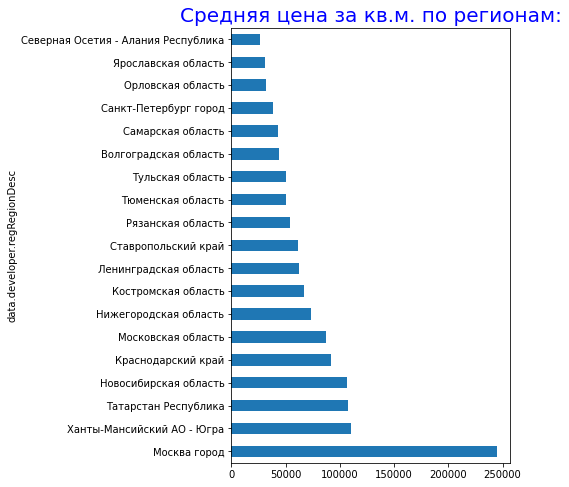

In [52]:
meen_price = DataFrame.calculation_meen_price(df_cl)
meen_price